# Sistemas de Equações Diferenciais Ordinárias - Parte 1

<br>

Considere o seguinte exemplo.

É importante que a temperatura de uma estufa se mantenha amena mesmo à noite, para criar as condições corretas para o desenvolvimento das plantas. Para isso, é criado um sistema de ventilação da seguinte forma.

Próximo à estufa, é construído um leito de rochas abaixo do solo, junto com isolantes térmicos. Assim, as rochas acumulam calor do sol durante o dia. 

À noite, o ar da estufa é ventilado através dessas rochas antes de retornar à estufa, com isso mantendo sua temperatura um pouco mais alta de maneira simples e barata.

<br>

<img src="https://github.com/guerinileonardo/figures/blob/main/estufa.png?raw=true" width="500">

<br>

Denotando por 

$$u_1(t),\quad u_2(t)$$ 

a temperatura do leito de rochas e a temperatura do ar dentro da estufa no instante $t$, e levando em conta as massas de ar em cada local, a superfície de contato, o coeficiente de transferência de calor, os calores específicos e a temperatura externa, utilizamos a lei da conservação de energia para chegar às seguintes equações diferenciais ordinárias:

$$
\begin{cases}
\frac{du_1}{dt} = -\frac{13}{8}u_1 + \frac34 u_2 + 14 \\ \\
\frac{du_2}{dt} = \frac{1}{4}u_1 - \frac14 u_2.
\end{cases}
$$

Note que ambas as variações $\frac{du_1}{dt}, \frac{du_2}{dt}$ dependem tanto da temperatura da estufa $u_1$ quanto da temperaturas do leito de pedras $u_2$.

Em notação matricial:

$$
\begin{pmatrix}\frac{du_1}{dt}\\ \frac{du_2}{dt} \end{pmatrix} =
\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix}
{u_1 \choose u_2} + 
{14 \choose 0}.
$$

Definindo as matrizes 

$$\textbf{u}={u_1\choose u_2,}, \quad \textbf{K}=\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix},\quad \textbf{b} = {14 \choose 0},$$ 

escrevemos o sistema linear de equações diferenciais

\begin{align}
\frac{d\textbf{u}}{dt} &= f(\textbf{u}, t) \\
&= \textbf{Ku} + \textbf{b}.
\end{align}

<br>

Vamos assumir que o sistema de ventilação é acionado a partir de um instante $t=0$ no início do anoitecer, quando a estufa está a $0^o$C e o leito de rochas está a $36^o$C. Assim, é esperado que a estufa vá retirando calor do leito de pedras.

Denotamos as temperaturas iniciais em cada local pelo vetor

$$
\textbf{u}(0) = {{u_1(0)} \choose {u_2(0)}} = {0 \choose 36}.
$$

<br>

***
<br>

É possível verificar que a função vetorial

$$
\textbf{u}(t) = {u_1(t) \choose u_2(t)} = {8e^{-t/8} - 24e^{-7t/4} + 16 \choose 16e^{-t/8} + 4e^{-7t/4} + 16}
$$

é uma solução para problema de valor inicial dado pelo sistema acima juntamente com a condição inicial indicada.

Assim, vemos que no limite em que $t \rightarrow \infty$, temos

$$
\lim_{t \rightarrow \infty}\textbf{u}(t) = {16 \choose 16}.
$$

### Pergunta:

Qual é a interpretação para o limite acima, no contexto do problema?

Resposta: Quando t tende a infinito, a temperatura u1 e u2 vai tender a 16 tanto em u1 e u2.

<br>

***
<br>

Vamos plotar o gráfico das funções $u_1(t), u_2(t)$ encontradas acima, no intervalo entre $t=0$ e $t=30$.

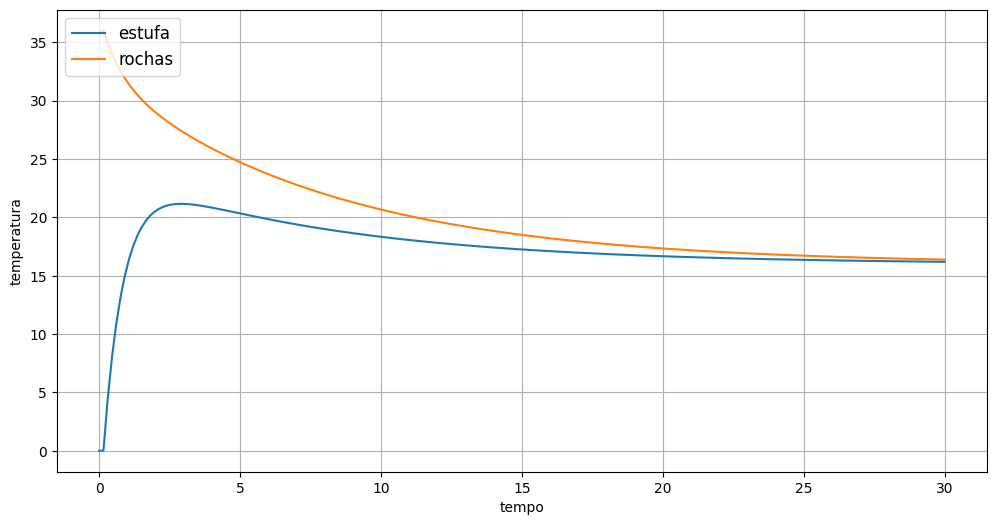

In [196]:
import matplotlib.pyplot as plt
import numpy as np

# definindo o tamanho do gráfico plotado
plt.rcParams['figure.figsize'] = [12, 6]

xi = np.linspace(0, 30, 200)
u1i = [0]
u2i = [36]

for x in xi[:-1]:
  u1 = 8*np.exp(-x/8) - 24*np.exp(-7*x/5) + 16
  u1i.append(u1)
  u2 = 16*np.exp(-x/8) + 4*np.exp(-7*x/5) + 16
  u2i.append(u2)

plt.plot(xi, u1i, label='estufa')
plt.plot(xi, u2i, label='rochas')
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('tempo')
plt.ylabel('temperatura')
plt.grid()
plt.show()

### Interprete o gráfico acima:

O gráfico indica que u1 e u2 tendem a 16 de forma exponencial conforme o tempo passa.

<br>

***
<br>

# Campos de vetores
<br>

A função vetorial $\textbf{u}(t)={u_1(t) \choose u_2(t)}$ é chamada **vetor de estado** do sistema. 

Em vez de plotar cada gráfico de $u_1, u_2$ separadamente, como feito acima, para cada instante $t$ podemos **plotar o vetor $\textbf{u}(t)$ através de suas coordenadas $(u_1(t), u_2(t))$**. 

O plano $u_1u_2$ é chamado **plano de fase** e a equação diferencial

$$
{u_1' \choose u_2'} = {-\frac{13}{8}u_1 + \frac34 u_2 + 14 \choose \frac{1}{4}u_1 - \frac14 u_2}
$$

nos ensina como associar a cada vetor ${u_1 \choose u_2}$ um segundo vetor ${u_1' \choose u_2'}$ que representa a taxa de variação nesse ponto. 

Construímos assim um **campo de vetores** associado a essa equação diferencial. 

<br><br>

Vamos estudar a equação diferencial acima, no retângulo dado por 

$$x\in[19, 23],\quad y\in[26, 31].$$ 

Para plotar seu gráfico, começamos construindo uma malha de pontos nesse retângulo.

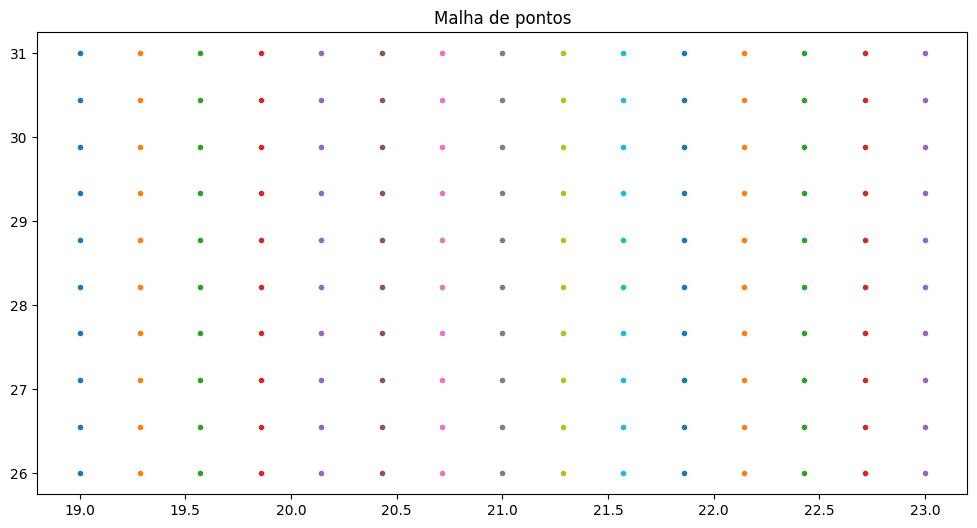

In [197]:
# rode a célula e comente cada linha abaixo, explicando o que ela faz

x_inic, x_final = 19, 23    # indica o primeiro e último ponto do eixo x
y_inic, y_final = 26, 31    # indica o primeiro e último ponto do eixo y

nx = 15    # gera 15 pontos no eixo x
ny = 10    # gera 10 pontos do eixo y

# Gera um array de pontos que inicia x_inic para x e y_inic para y. Terminando em x_final e y_final com nx e ny pontos
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# gera uma malha com pontos na coordenada x_ponto e y_ponto
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)    

plt.plot(x_malha, y_malha, '.')
plt.title('Malha de pontos')
plt.show()

Vamos agora associar a cada ponto dessa malha um vetor representando a variação que as soluções da equação diferencial possuem.

In [198]:
# comente cada parte do código abaixo

# Cria uma função f com entradas u1 e u2 que retorna o valor de u1' e u2'
def f(u1, u2):
    return [-(13/8)*u1 + (3/4)*u2 + 14,
            u1/4 - u2/4]

# Cria um vetor de zeros para x e y com tamanho de x_malha e y_malha
x_vetor = np.zeros(x_malha.shape)   
y_vetor = np.zeros(y_malha.shape)
print(x_vetor.shape)
print(y_vetor.shape)
for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # laço for que cria uma matriz de x e y com os valores da matriz x_malha e y_malha e calcula o valor da edo em x e y, criando um vetor com os resultados.
        y_vetor[i, j] = vet[1]


(10, 15)
(10, 15)


Agora finalmente podemos plotar o campo vetorial utilizando o comando `plt.quiver`.

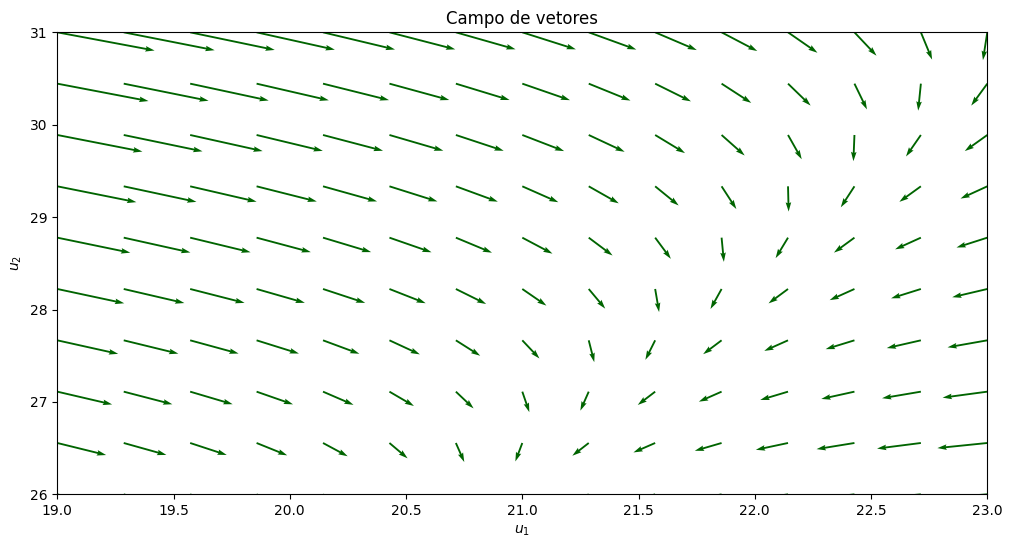

In [199]:
# plotando os pontos e os vetores associados a cada um deles
plt.quiver(x_ponto, y_ponto, x_vetor, y_vetor, color='darkgreen', width=0.002, angles='xy')

plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Campo de vetores')
plt.show()

Outro comando útil para visualizar o fluxo no campo de vetores é o `plt.streamplot`.

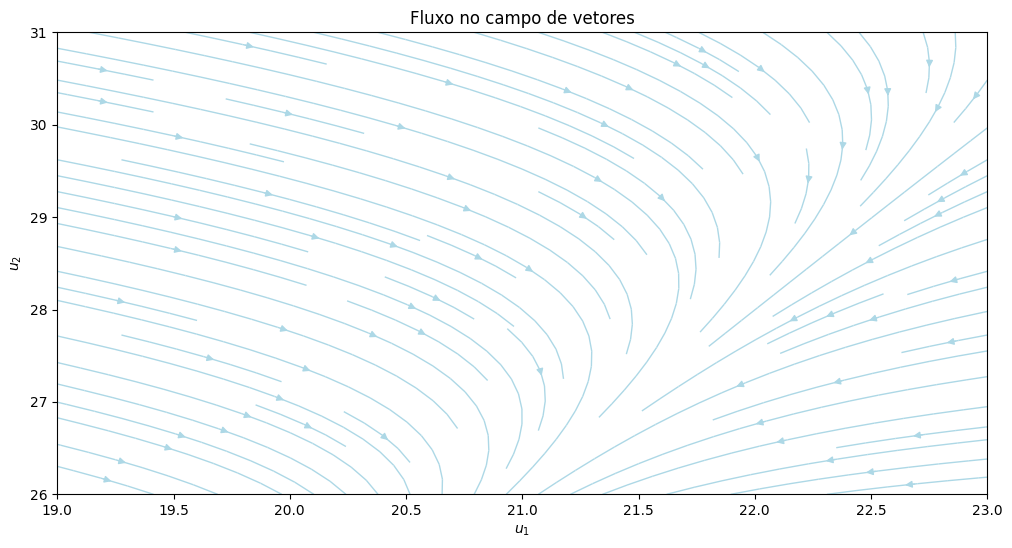

In [200]:
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1, linewidth=1)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Fluxo no campo de vetores')
plt.show()

**As soluções da equação diferencial são justamente as funções cujo gráfico se encaixa suavemente nesse campo de vetores.**

# Trajetórias

Fixemos um vetor de estado inicial, $\textbf{u}(t_0) = {u_1(t_0) \choose u_2(t_0)}$. À medida que $t$ varia, a extremidade de $\textbf{u}(t)$ descreve uma **trajetória** no plano de fase.

Vejamos a trajetória obtida pela solução particular

$$
\textbf{u}_{part}(t) = {8e^{-t/8} - 24e^{-7t/4} + 16 \choose 16e^{-t/8} + 4e^{-7t/4} + 16}
$$

vista acima, associada à condição inicial

$$
\textbf{u}(0) = {0 \choose 36}.
$$

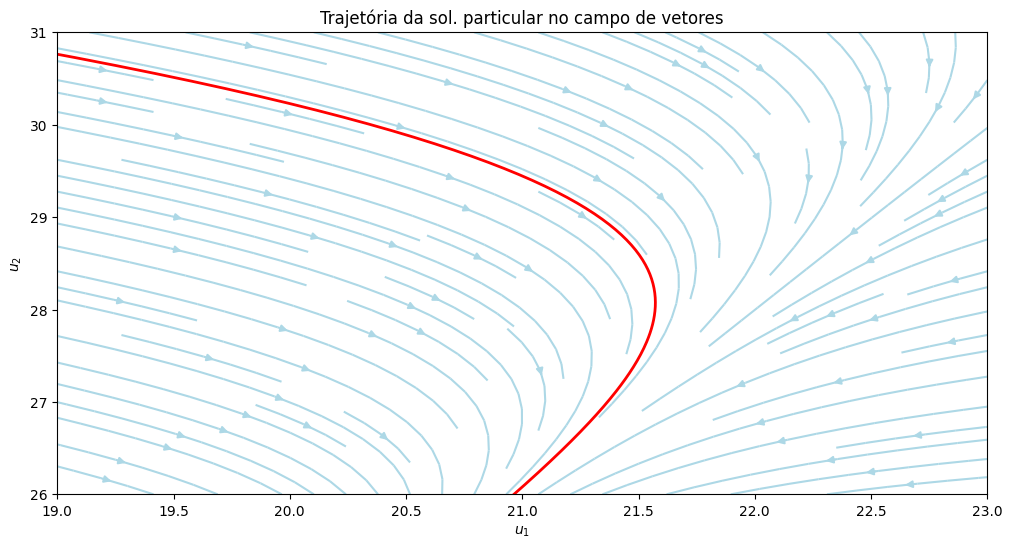

In [201]:
# definindo solução particular
def u_part(t):
    return [8*np.exp(-t/8) - 24*np.exp(-7*t/4) + 16,
            16*np.exp(-t/8) + 4*np.exp(-7*t/4) + 16]

ti = np.linspace(1, 4, 200)
x_part, y_part = u_part(ti)
    
# trajetória
plt.plot(x_part, y_part, '-', color='red', linewidth=2)

# campo de vetores anterior
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetória da sol. particular no campo de vetores')
plt.show()

<br><br>

Para estudar múltiplas trajetória, podemos utilizar a biblioteca SymPy para calcular diferentes soluções da equação diferencial (associadas a diferentes condições iniciais).

In [202]:
import sympy as sp
sp.init_printing()

# comente as linhas abaixo

t = sp.symbols('t') #transforma a string t em uma classe simbólica de simpy
u1 = sp.Function('u1') #transforma a string u1 em uma classe simbólica
u2 = sp.Function('u2') #transforma u2 em uma classe simbólica
eqs = [sp.Eq(sp.Derivative(u1(t), t), -(13/8)*u1(t) + (3/4)*u2(t) + 14),
       sp.Eq(sp.Derivative(u2(t), t), u1(t)/4 - u2(t)/4)] #gera as equações diferenciais de u1 e u2
eqs #mostra as equações diferenciais armazenadas em eqs 

⎡d                                           d           u₁(t)   u₂(t)⎤
⎢──(u₁(t)) = -1.625⋅u₁(t) + 0.75⋅u₂(t) + 14, ──(u₂(t)) = ───── - ─────⎥
⎣dt                                          dt            4       4  ⎦

In [203]:
# resolvendo o par de equações acima associado ao valor inicial (a,b)
a, b = 0, 0
sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): a, u2(0): b})

⎡                                 -1.75⋅t                     -0.125⋅t        
⎣u₁(t) = 16.0 - 7.38461538461539⋅ℯ        - 8.61538461538461⋅ℯ        , u₂(t) 

                           -1.75⋅t                     -0.125⋅t⎤
= 16.0 + 1.23076923076923⋅ℯ        - 17.2307692307692⋅ℯ        ⎦

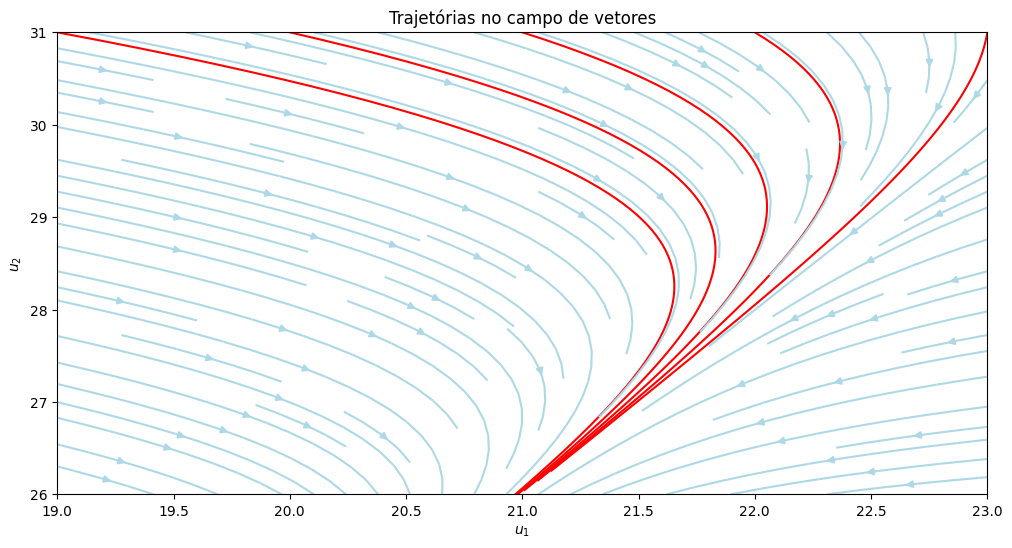

In [204]:
# comente as linhas abaixo

tspan = np.linspace(0, 3, 100) #gera 100 pontos entre 0 e 3

valores = np.linspace(19, 23, 5) #gera 5 pontos entre 19 e 23 para serem usados no cálculo da condição inicial

for valor_inic in valores:
    f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): valor_inic, u2(0): 31}) #resolver u1 e u2 e armazena em f1 e f2
    uu1 = sp.lambdify(t, f1.rhs) #converte a função f1 em uma função numérica
    uu2 = sp.lambdify(t, f2.rhs) #converte a função f2 em uma função numérica
    plt.plot(uu1(tspan), uu2(tspan), 'r-') #plota um gráfico de eixos u1 e u2 com pontos dado por tspan

plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetórias no campo de vetores')
plt.show()

<br><br>

## Exercício 1:

Plote esse mesmo campo de vetores em outra região do plano, de modo a visualizar que todas as soluções $\textbf{u}$ do sistema de fato satisfazem o limite

$$
\lim_{t \rightarrow \infty}\textbf{u}(t) = {16 \choose 16}.
$$

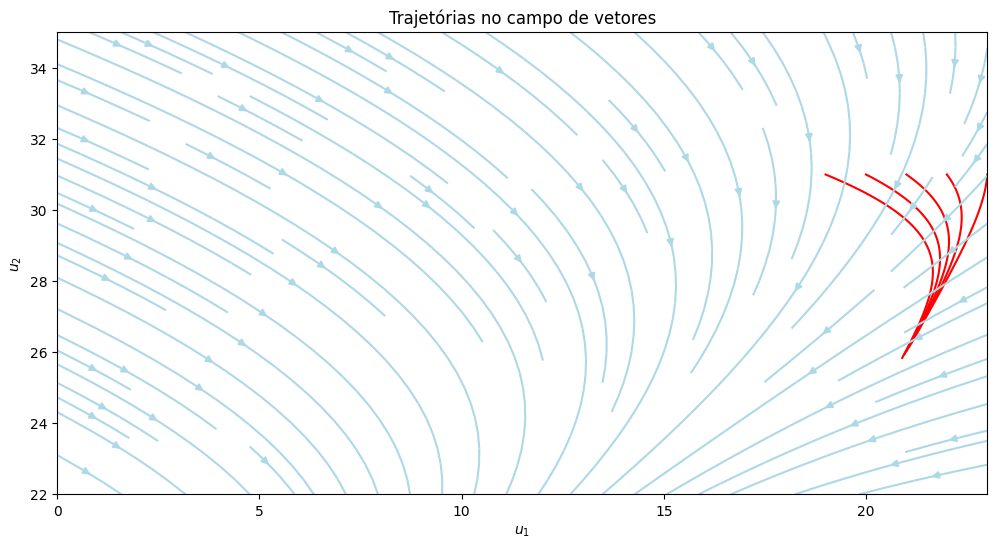

In [205]:
# resolva o exercício aqui; crie mais células de código, se necessário
x_inic, x_final = 0, 23    # indica o primeiro e último ponto do eixo x
y_inic, y_final = 22, 35    # indica o primeiro e último ponto do eixo y

nx = 15    # gera 15 pontos no eixo x
ny = 10    # gera 10 pontos do eixo y

# Gera um array de pontos que inicia x_inic para x e y_inic para y. Terminando em x_final e y_final com nx e ny pontos
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)



tspan = np.linspace(0, 3, 100) #gera 100 pontos entre 0 e 3

valores = np.linspace(19, 23, 5) #gera 5 pontos entre 19 e 23 para serem usados no cálculo da condição inicial

for valor_inic in valores:
    f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): valor_inic, u2(0): 31}) #resolver u1 e u2 e armazena em f1 e f2
    uu1 = sp.lambdify(t, f1.rhs) #converte a função f1 em uma função numérica
    uu2 = sp.lambdify(t, f2.rhs) #converte a função f2 em uma função numérica
    plt.plot(uu1(tspan), uu2(tspan), 'r-') #plota um gráfico de eixos u1 e u2 com pontos dado por tspan

plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetórias no campo de vetores')
plt.show()

<br>
<br>

***
<br>

# Reduzindo Equações Diferenciais do Segundo Grau

É possível reduzir equações diferenciais de segundo grau a um sistema de equações do primeiro grau. Vejamos um exemplo.

O movimento de um pêndulo não-amortecido é descrito pela equação

$$
y'' = -sen(y).
$$

Podemos reduzir a equação acima a um par de equações ordinárias determinando as funções

$$
y_1 = y,\quad y_2 = y',
$$

de modo que a equação se torna 

$$
\begin{cases}
y_1' = y_2 \\
y_2' = -sen(y_1)
\end{cases}.
$$

Vamos estudar o campo de vetores associado a esse sistema de equações.

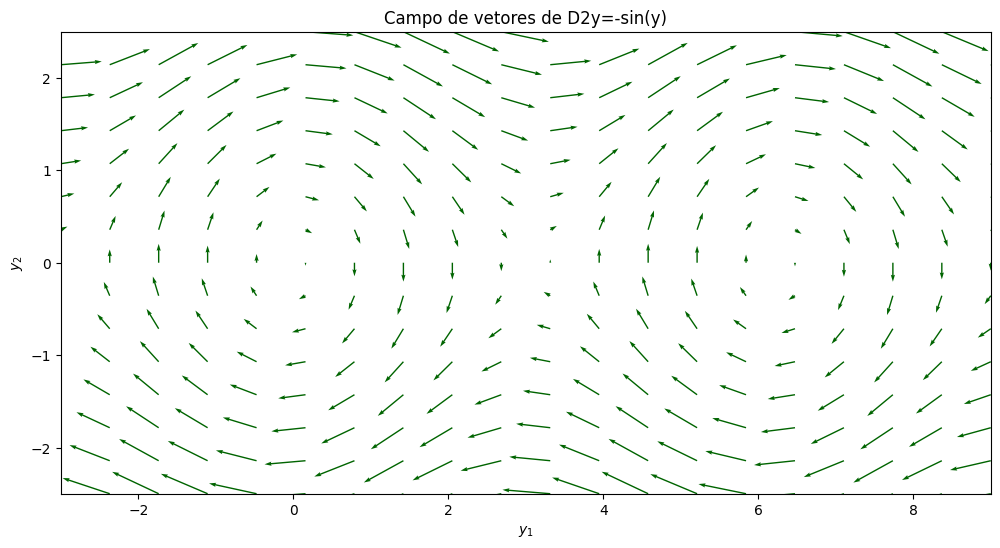

In [206]:
################################# malha de pontos

x_inic, x_final = -3, 9    # intervalo estudado no eixo x
y_inic, y_final = -2.5, 2.5    # intervalo estudado no eixo y

nx = 20    # número de pontos que queremos entre x_inic e x_final
ny = 15    # número de pontos que queremos entre y_inic e y_final

# coordenadas dos pontos a serem plotados
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# definindo uma malha de pontos com essas coordenadas
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)    

################################# associando vetores a cada ponto da malha

# a equação diferencial é da forma (u1, u2)' = f(u1, u2)
def g(y1, y2):
    return [y2, -np.sin(y1)]

x_vetor = np.zeros(x_malha.shape)   # coordenadas x de cada vetor inicializadas em 0
y_vetor = np.zeros(y_malha.shape)   # coordenadas y de cada vetor inicializadas em 0

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = g(x, y)
        x_vetor[i, j] = vet[0]    # preenchendo as coordenadas dos vetores
        y_vetor[i, j] = vet[1]

# campo vetorial
plt.quiver(x_ponto, y_ponto, x_vetor, y_vetor, color='darkgreen', width=0.0015, angles='xy')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Campo de vetores de D2y=-sin(y)')
plt.show()

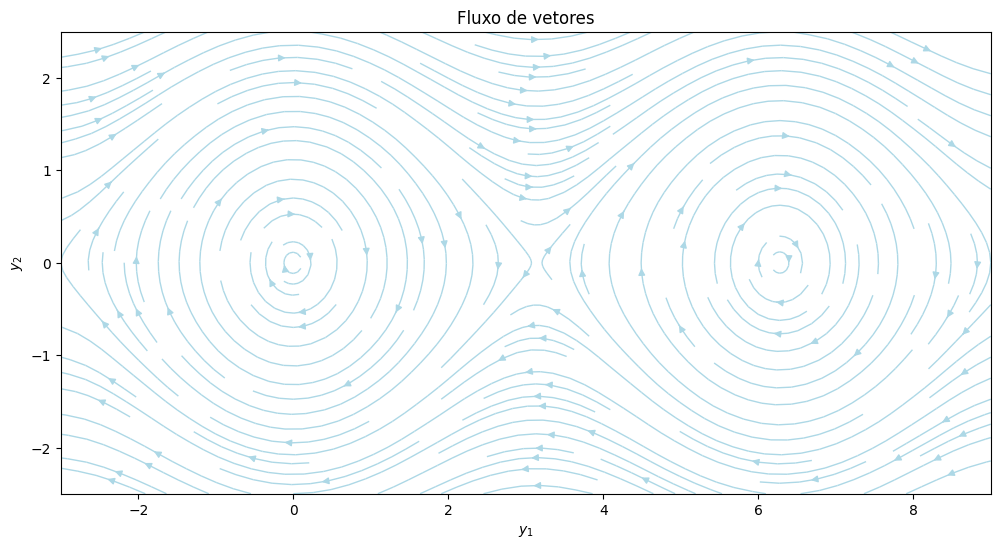

In [207]:
################################### fluxo de vetores no campo vetorial

plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Fluxo de vetores')
plt.show()

In [208]:
###################### definindo as equações diferenciais

x = sp.symbols('x')
y1 = sp.Function('y1')
y2 = sp.Function('y2')
eqs = [sp.Eq(sp.Derivative(y1(x), x), y2(x)),
       sp.Eq(sp.Derivative(y2(x), x), -sp.sin(y1(x)))]
eqs

⎡d                  d                      ⎤
⎢──(y₁(x)) = y₂(x), ──(y₂(x)) = -sin(y₁(x))⎥
⎣dx                 dx                     ⎦

<br>

Porém, nesse caso, a biblioteca Sympy não consegue resolver a equação diferencial:

In [209]:
f1, f2 = sp.dsolve(eqs, [y1(x), y2(x)], ics={y1(0): 0, y2(0): 0})

ValueError: ignored

<br><br>

Portanto, utilizaremos a biblioteca de computação científica, SciPy.

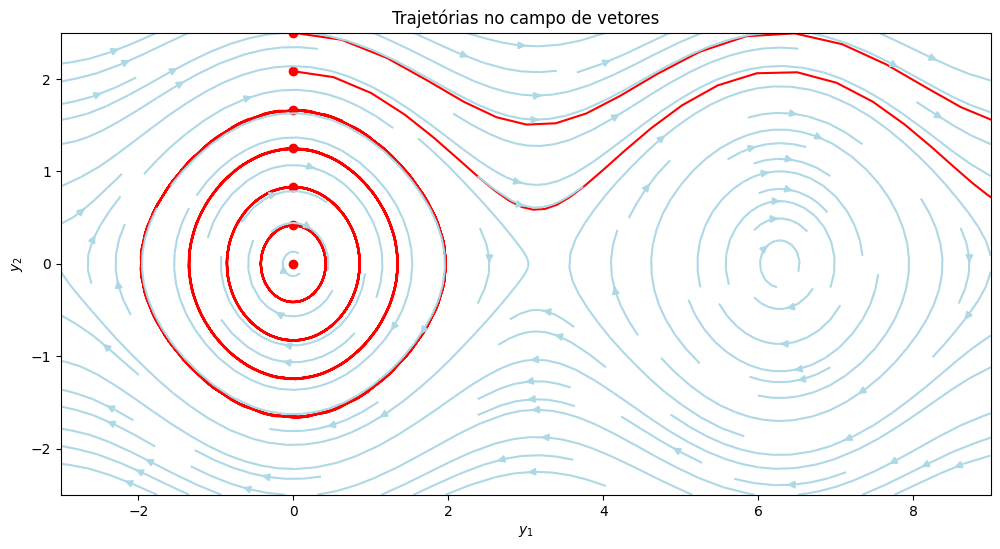

In [210]:
# redefinindo em outro formato a função associada ao sistema de EDOs, evidenciando
# a variável x
def F(y, x):
    y1, y2 = y
    return y2, -np.sin(y1)

# importando a função da biblioteca que resolve EDOs
from scipy.integrate import odeint

# resolvemos o PVI associado para cada valor inicial diferente (dado por y0)
for valor_inic in np.linspace(0, 2.5, 7):
    xspan = np.linspace(0, 50, 200)
    y0 = [0.0, valor_inic]                   # definindo o valor inicial da trajetória
    ys = odeint(F, y0, xspan)                # resolvendo o sistema
    plt.plot(ys[:, 0], ys[:, 1], 'r-')       # plotando a trajetória da solução
    plt.plot([ys[0, 0]], [ys[0, 1]], 'ro')   # marcando o ponto inicial da trajetória


# campo de vetores anterior
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetórias no campo de vetores')
plt.show()

<br><br>

***
<br><br>

# Exercício 2

Plote os campos de vetores, fluxos e trajetórias associados à equação diferencial

$$
\begin{cases}
y_1' = y_1 + y_2 \\
y_2' = 4y_1 + y_2
\end{cases}
$$

no retângulo $x\in[-4,4],\ y\in[-4,4]$.

In [ ]:
# resolva aqui